In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
%matplotlib inline



In [2]:
df=pd.read_csv("C:\\Users\\SMART\\Desktop\\pract\\TF CHALLENGE\\covid2019.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.4150,-61.3710,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,-61.6790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,-18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
data=df.drop(columns=['Province/State'])

In [4]:
data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,...,75,82,114,147,177,212,272,322,411,599
1,Japan,36.0000,138.0000,2,1,2,2,4,4,7,...,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,...,200,212,226,243,266,313,345,385,432,455
3,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [5]:
colnames=list(data.columns)

In [6]:
rows=data.shape[0]

In [7]:
modifiedColNames=colnames[3:]
l=[]
for name in modifiedColNames:
  r=np.count_nonzero(data[name])
  remain=rows-r
  percent=(remain/rows)*100

  if percent>70:
    data=data.drop(columns=name)

In [8]:
data.head()

,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,15.0000,101.0000,43,47,48,50,50,50,53,...,75,82,114,147,177,212,272,322,411,599
1,Japan,36.0000,138.0000,331,360,420,461,502,511,581,...,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,1.2833,103.8333,110,117,130,138,150,150,160,...,200,212,226,243,266,313,345,385,432,455
3,Nepal,28.1667,84.2500,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,Malaysia,2.5000,112.5000,50,50,83,93,99,117,129,...,197,238,428,566,673,790,900,1030,1183,1306


In [9]:
data1=data['Lat']
data2=data['Long']
df1=data.drop(columns=['Lat','Long'])
df2 = df1.groupby(['Country/Region'],as_index=False).sum()

In [10]:
df2.shape
df2.tail()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
166,Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43
167,Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70
168,Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113
169,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3
170,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3


In [11]:
dcols=list(df2.columns)

In [12]:
o=[]
for column in dcols:
  t=df2[column].sum()
  o.append(t)

In [13]:
rowsum=df2.sum(axis=1)

In [14]:
df2['Total ']=rowsum
df2.head()


,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Afghanistan,1,1,1,1,4,4,5,7,7,...,11,16,21,22,22,22,24,24,40,240
1,Albania,0,0,0,0,0,2,10,12,23,...,38,42,51,55,59,64,70,76,89,624
2,Algeria,12,12,17,17,19,20,20,20,24,...,37,48,54,60,74,87,90,139,201,977
3,Andorra,1,1,1,1,1,1,1,1,1,...,1,1,2,39,39,53,75,88,113,421
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,5


In [15]:
a1=df2['Country/Region']
a2=df2['Total ']
a1
cn=["Country","Total_cases"]
dfp1 = pd.DataFrame(columns = cn)
dfp1['Country']=a1
dfp1['Total_cases']=a2
dfp1.head()

,Country,Total_cases
0,Afghanistan,240
1,Albania,624
2,Algeria,977
3,Andorra,421
4,Angola,5


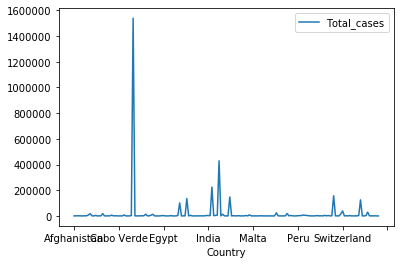

In [16]:
dfp1.plot(x='Country',y='Total_cases',kind = 'line')
plt.show()

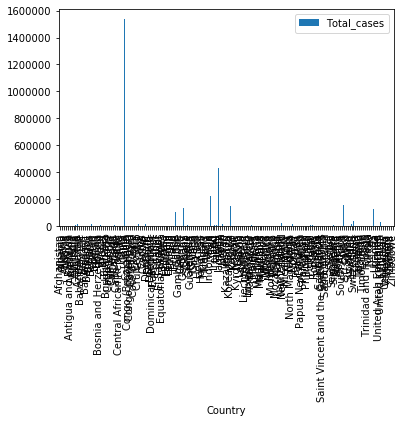

In [17]:
dfp1.plot(x='Country',y='Total_cases',kind = 'bar')

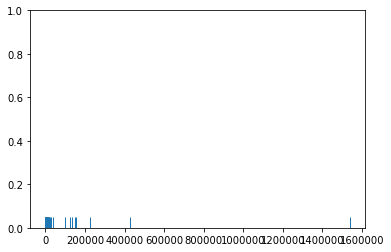

In [20]:
sns.rugplot(dfp1['Total_cases'])

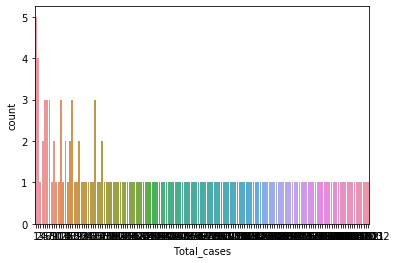

In [21]:
sns.countplot(x="Total_cases",data=dfp1)

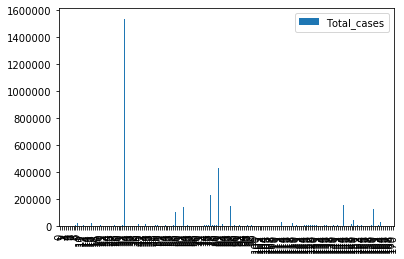

In [23]:
dfp1.plot.bar()

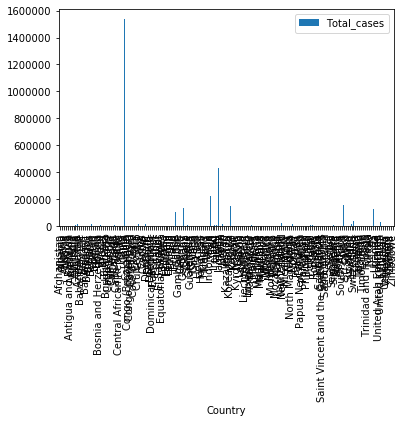

In [24]:
dfp1.plot(x='Country',y='Total_cases',kind='bar')

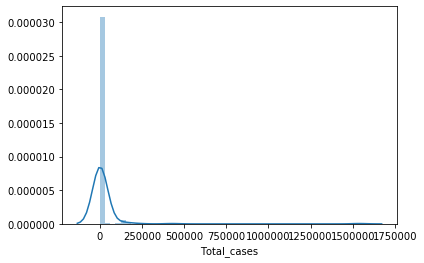

In [25]:
sns.distplot(dfp1['Total_cases'])

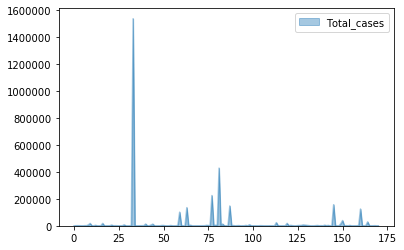

In [26]:
dfp1.plot.area(alpha=0.4)


In [27]:
dfp1['Total_cases'].describe()

count    1.710000e+02
mean     1.879782e+04
std      1.244992e+05
min      1.000000e+00
25%      2.650000e+01
50%      4.210000e+02
75%      2.326000e+03
max      1.538032e+06
Name: Total_cases, dtype: float64

In [28]:
top=dfp1.nlargest(15,'Total_cases')
top

,Country,Total_cases
33,China,1538032
81,Italy,428621
77,Iran,224700
145,Spain,156912
87,"Korea, South",147381
63,Germany,135037
160,US,124813
59,France,101444
150,Switzerland,39007
164,United Kingdom,29253


c:\users\smart\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



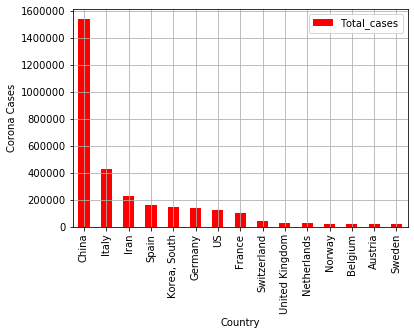

In [29]:
from matplotlib import style
#style.use('ggplot')

top.plot(x='Country',y='Total_cases',kind='bar',linewidth=5,color='R')
plt.ylabel('Corona Cases')

plt.grid()
plt.show()

In [ ]:
###################################  REAMANIG CODE WILL UPLOADEDAS SOON AS POSSIBLE

In [45]:
df3=df2.loc[df2['Country/Region'] == 'Italy']

In [46]:
df3

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
81,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,428621


In [32]:
df4=df3.drop(columns=['Country/Region','Total '])
df4

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
81,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


In [59]:
dates=list(df4.columns)


In [ ]:
cases=[]
for date in dates:
    x=df4.get_value(81,date)
    cases.append(x)

In [61]:
cases

[]

In [ ]:
task2=pd.DataFrame(columns=['dates','cases'])

In [ ]:
task2['dates']=dates
task2['cases']=cases


In [ ]:
task2


In [ ]:
task2.plot(x='dates',y='cases',kind='bar',color='red')
plt.ylabel('cases')
plt.title('Italy\'s Covid-19 cases/date')
plt.show()

In [ ]:
continents=pd.read_csv('"C:\\Users\\SMART\\Desktop\\pract\\TF CHALLENGE\\Countries-Continents.csv')

In [ ]:
continents.head()
c1=continents['Continent']
c2=continents['Country']
cont=pd.DataFrame(columns=['Country/Region','Continent'])
cont['Continent']=c1
cont['Country/Region']=c2
cont.head()

In [ ]:
df2.head()

In [ ]:
merged = df2.merge(cont, on='Country/Region')
merged.head()

In [ ]:
merged.tail()

In [ ]:
merged1 = merged.groupby(['Continent'],as_index=False).sum()

In [ ]:
merged1.head()

In [ ]:
top5continents=merged1.nlargest(5,'Total ')
top5continents



In [ ]:
h1=top5continents['Continent']
h2=top5continents['Total ']
h3=top5continents['3/22/20']
task3=pd.DataFrame(columns=['Continent','Cases'])
task3['Continent']=h1
task3['Cases']=h2
task3

In [ ]:
task3.plot(x='Continent',y='Cases',kind='bar',color='green')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.title('Continent-wise representation of number of Covid-19 Cases upto 22nd March,2020 ')
plt.show()

In [ ]:
t4=pd.DataFrame(columns=['Continent','Cases'])
t4['Continent']=h1
t4['Cases']=h3
t4
#These are the cases on 22nd March,2020

In [ ]:
t4.plot(x='Continent',y='Cases',kind='bar',color='green')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.title('Continent-wise representation of number of Covid-19 Cases on 22nd March,2020 ')
plt.show()

In [ ]:
h2

In [ ]:
k=list(task3['Cases'])
k

In [ ]:
x=np.sum(k)
x

In [ ]:
k=(k/x)*100

In [ ]:
percentage=list(k)

In [ ]:
topic=list(task3['Continent'])


In [ ]:
sizes = percentage
labels = list(topic)
explode = (0.1, 0.1 , 0.1, 0.1,0.5)  
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 20 else ''
colors = ['purple', 'cyan', 'orange', 'yellow', 'black']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=False, startangle=60) 
plt.axis('equal')
plt.legend()
plt.title('Amongst affected continents')
plt.show()

In [ ]:
top5.tail()

In [ ]:
labels=['China','Italy','Iran','Spain','South Korea','Germany','US','France','Switzerland','United Kingdom']
k=list(top5['Total Covid-19 cases'])
x=np.sum(k)
k=k/x
k=k*100
sizes=list(k)

In [ ]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct=my_autopct, shadow=False, startangle=20) 
plt.axis('equal')
plt.legend()
plt.title('Top-10 affected countries due to Covid-19')
plt.show()